# Various stuff for the inverter control

Draft notebook:

* Plot of 3phase voltages
* Low-pass filter design to filter out the switching frequency

## Plots of three phase voltages

Note : this should be merged with https://github.com/pierre-haessig/trace-triphi

In [1]:
import numpy as np
from numpy import pi, cos, sin, sqrt
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
Nper = 1
Npts = 500
th = np.linspace(0, 2*pi*Nper, Npts)

ia = cos(th)
ib = cos(th-2*pi/3)
ic = cos(th-4*pi/3)

In [4]:
sin(2*pi/3)

0.86602540378443871

In [5]:
def label_2pi12(Nper):
    pos = np.linspace(0, 2*pi*Nper, Nper*12+1) # pi/6 spacing
    
    num_list = range(0, Nper*12+1)
    den = 6
    from fractions import Fraction
    labels = [Fraction(num, den) for num in num_list]
    
    def fmt_pi_frac(frac):
        num, den = frac.numerator, frac.denominator
        if den == 1: # integer
            if num == 0:
                return '0'
            elif num == 1:
                return r'$\pi$'
            elif num == -1:
                return r'$-\pi$'
            else:
                return r'${:d}\pi$'.format(num)
        else: # den != 1
            if num==1: # pi/den
                return r'$\frac{{\pi}}{{{:d}}}$'.format(den)
            elif num == -1:
                return r'$-\frac{{\pi}}{{{:d}}}$'.format(den)
            else:
                return r'$\frac{{{:d}\pi}}{{{:d}}}$'.format(num,den)
    labels = map(fmt_pi_frac, labels)
    
    return pos, labels

label_2pi12(1)

(array([ 0.        ,  0.52359878,  1.04719755,  1.57079633,  2.0943951 ,
         2.61799388,  3.14159265,  3.66519143,  4.1887902 ,  4.71238898,
         5.23598776,  5.75958653,  6.28318531]),
 ['0',
  '$\\frac{\\pi}{6}$',
  '$\\frac{\\pi}{3}$',
  '$\\frac{\\pi}{2}$',
  '$\\frac{2\\pi}{3}$',
  '$\\frac{5\\pi}{6}$',
  '$\\pi$',
  '$\\frac{7\\pi}{6}$',
  '$\\frac{4\\pi}{3}$',
  '$\\frac{3\\pi}{2}$',
  '$\\frac{5\\pi}{3}$',
  '$\\frac{11\\pi}{6}$',
  '$2\\pi$'])

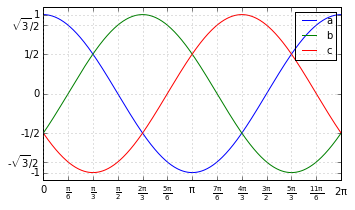

In [6]:
fig = plt.figure(figsize=(5,3))
plt.plot(th, ia, label='a')
plt.plot(th, ib, label='b')
plt.plot(th, ic, label='c')
plt.legend();

plt.xticks(*label_2pi12(Nper));
plt.yticks([-1, -sin(2*pi/3), -0.5, 0, 0.5, sin(2*pi/3), 1],
           ['-1', '$-\sqrt{3}/2$', '-1/2', '0', '1/2', '$\sqrt{3}/2$', '1']);
plt.grid(color=(0.5, 0.5, 0.5))
plt.xlim(0, 2*pi*Nper)
plt.ylim(-1.1, 1.1)

fig.tight_layout()

fig.savefig('abc_1per.png', dpi=200)

## LP filter to filter out the switching frequency

simple filter:

$$ H(s) = 1/(1+\tau s)^n$$

Q: find appropriate n and tau

In [7]:
fs = 10e3 # Hz
f_grid = 50 # Hz

# desired attenuation @fs
a = 2.0 # 1:1000 atten

In [8]:
def tau(n):   
    return 10**(a/n - np.log10(2*pi*fs)) # s
tau(1), tau(2), tau(3), tau(4)

(0.001591549430918952,
 0.00015915494309189522,
 7.3873180666961862e-05,
 5.0329212104486995e-05)

In [9]:
def phi(n):    
    return -n*np.angle(1+2j*pi*tau(n)*f_grid) * (180/pi)
phi(1), phi(2), phi(3), phi(4)

(-26.565051177077969,
 -5.7248104522234913,
 -3.9884357901330487,
 -3.6234013415386404)

In [13]:
tau(100), phi(100)

(1.6665568447493961e-05, -29.997749108510803)

conclusion: there is an increase for "big values" of n